In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [18]:
APPLE = 0
BANANA = 1
COCONUT = 2

look_up = [
    [0.1, -0.4, 0.2, 0.5],
    [0.4, 1.4, -1.0, 0.1],
    [1.1, 0.9, 1.1, 0.5]
]

x_train = torch.Tensor([
    [*look_up[APPLE], 1], 
    [*look_up[BANANA], 5], 
    [*look_up[COCONUT], 6]
])

y_train = torch.Tensor([
    [*look_up[BANANA], 0], 
    [*look_up[COCONUT], 16], 
    [*look_up[COCONUT], 20]
])

In [19]:
input_size = 5
output_size = 5
num_steps = 20000
learning_rate = 0.01

In [20]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, 4)
        self.layer2 = torch.nn.Linear(4, 3)
        self.layer3 = torch.nn.Linear(3, output_size)
        
    def forward(self, x):
        s1 = F.sigmoid(self.layer1(x))
        s2 = F.sigmoid(self.layer2(s1))
        y_hat = self.layer3(s2)
        return y_hat

In [21]:
model = Model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = []
for step in range(num_steps):
    y_hat = model(x_train)
    loss = criterion(y_hat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())

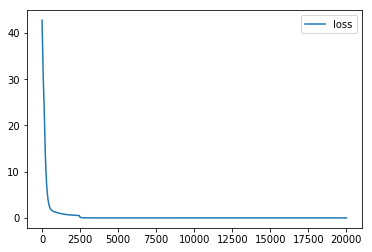

In [22]:
plt.plot(loss_history, label="loss")
plt.legend()
plt.show()

In [24]:
x_test = torch.Tensor([
    [*look_up[APPLE], 3], 
    [*look_up[COCONUT], 5]]
)

predict = model(x_test)
print(x_test)
print(predict)

tensor([[ 0.1000, -0.4000,  0.2000,  0.5000,  3.0000],
        [ 1.1000,  0.9000,  1.1000,  0.5000,  5.0000]])
tensor([[  0.4008,   1.3995,  -0.9977,   0.1004,   0.0116],
        [  1.1000,   0.9000,   1.1000,   0.5000,  19.9998]])
